# 기계학습및실습 2024년 2학기 중간과제

## 타이타닉 데이터셋 분석

인공지능융합학부 최민규(2020100399)

## 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# train 데이터셋 불러오기
df = pd.read_csv("./data/train.csv", index_col="PassengerId")

# train 데이터 head
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# test 데이터셋 불러오기
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")

# test 데이터 head
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


각 행의 의미  
  
Survived: 0=사망, 1=생존  
Pclass: 1=1등석, 2=2등석, 3=3등  
Sex: male=남성, female=여성  
Age: 나이  
SipSp: 타이타닉 호에 동승한 자매 / 배우자의 수  
Parch: 타이타닉 호에 동승한 부모 / 자식의 수  
Ticket: 티켓 번호  
Fare: 승객요금  
Cabin: 방 호수  
Embarked: 탑승지, S=사우샘프턴, C=셰르부르, Q=퀸즈타운  

In [5]:
# train 데이터 행열
df.shape

(891, 12)

In [8]:
# train 데이터 tail
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 데이터의 차이  
  
train 데이터는 test 데이터와 다르게 Sruvived 행이 없다.  
train 데이터는 Age, Cabin, Embarked에 결측치가 있다.  
test 데이터는 Age, Cabin, Fare에 결측치가 있다.  

In [14]:
# train 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
# test 데이터 정보 확인
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [20]:
import pandas as pd
df = pd.read_csv("./data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")

# 결측치 확인 함수
def missing_values(data):
    return data.isnull().sum()

print("Train 데이터 결측치:")
print(missing_values(df))
print("\nTest 데이터 결측치:")
print(missing_values(test_df))
print("\n")

Train 데이터 결측치:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Test 데이터 결측치:
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64




## 기초 데이터 분석

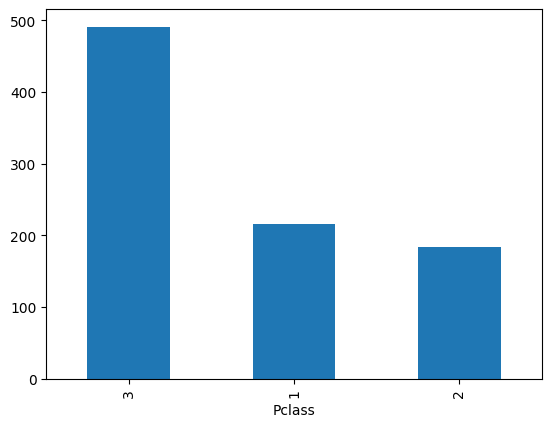

In [33]:
# 좌석 등급마다 탑승한 승객수
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

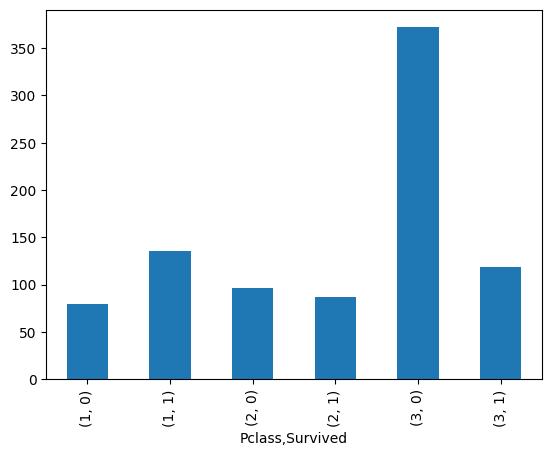

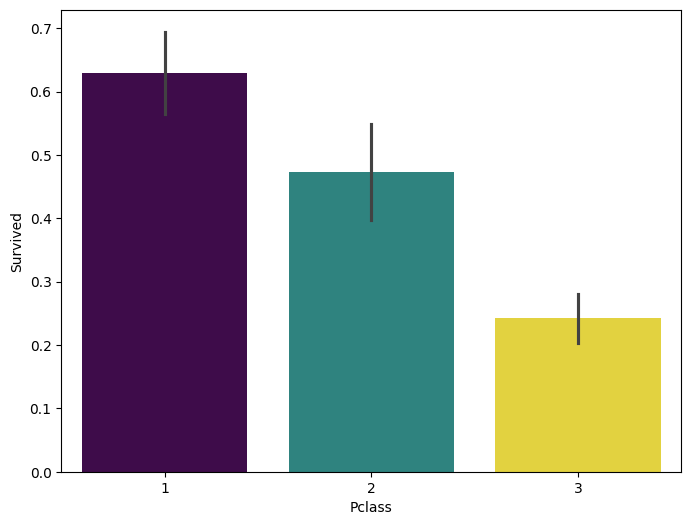

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")

# 좌석 등급에 따른 생존자와 사망자
survival_by_pclass = df.groupby('Pclass')['Survived'].value_counts(sort=False) 
survival_by_pclass.plot(kind="bar")
plt.show()

# 좌석 등급에 따른 생존율을 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='viridis', legend=False)
plt.show()

train 데이터의 Pclass 카테고리의 개수를 살펴보았습니다. 3등석, 1등석, 1등석순으로 인원이 많다.
다음으로 좌석 등급에 따른 생존율을 비교할 수 있는데 1등급 좌석의 경우 생존율이 우세하고 2등급은 서로 비슷하며 3등급은 사망율이 더 높다.  
그래프를 통해 생존율을 시각화 했을 때 1등급 좌석과 3등급 좌석은 30%가 넘게 큰 차이가 난다는 걸 알 수 있다.  

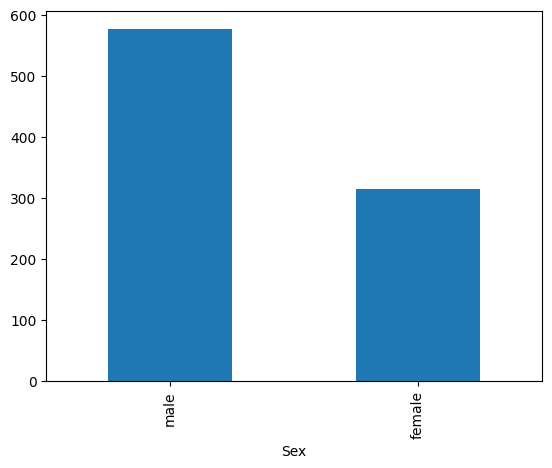

In [43]:
# 성별마다 탑승한 승객수
df["Sex"].value_counts().plot(kind="bar", x="Sex")
plt.show()

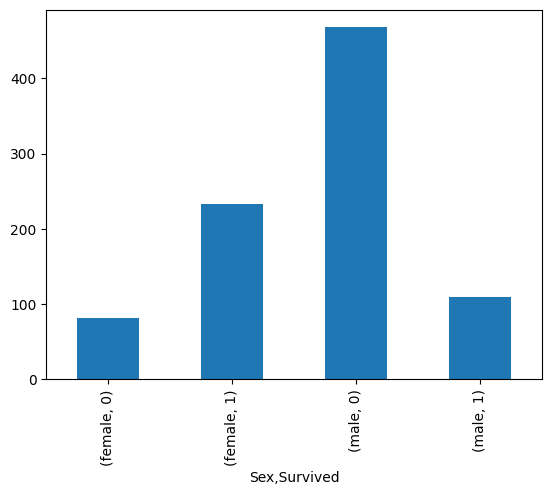

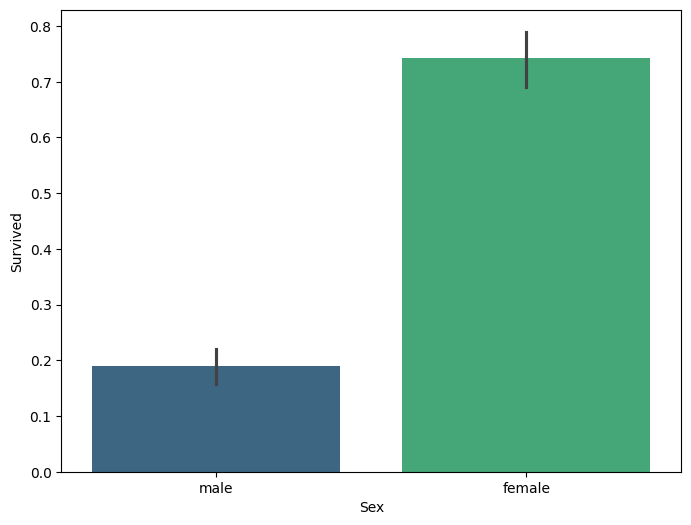

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")

# 성별에 따른 생존자와 사망자
survival_by_sex = df.groupby('Sex')['Survived'].value_counts(sort=False) 

survival_by_sex.plot(kind="bar")
plt.show()

# 성별에 따른 생존율을 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, palette='viridis', legend=False)

plt.show()

train 데이터의 Sex 카테고리의 개수를 살펴보았을 때 남성이 여성보다 많다.  
다음으로 성별에 따른 생존율을 비교할 수 있는데 여성에 비해 남성은 많은 인원이 사망했다.  
그래프를 통해 생존율을 시각화 했을 때 여성이 훨씬 높은 생존율을 보인다.  

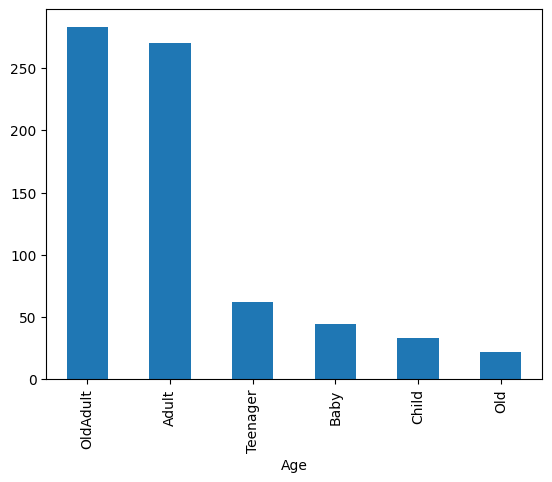

In [9]:
# 나이마다 탑승한 승객수
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old']).value_counts().plot(kind="bar", x="Age")
plt.show()

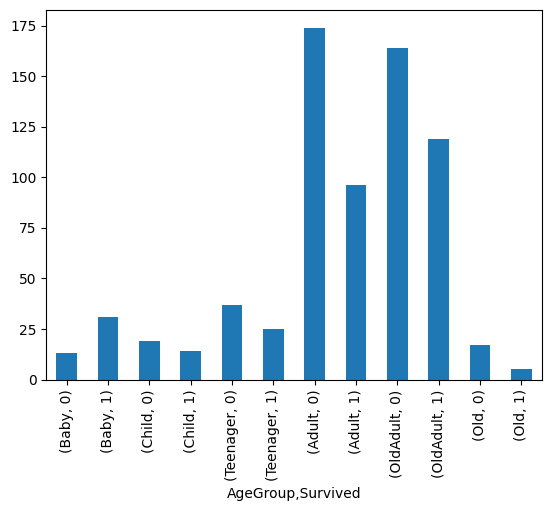

Survival rate by Age Group:
AgeGroup
Baby        0.704545
Child       0.424242
Teenager    0.403226
Adult       0.355556
OldAdult    0.420495
Old         0.227273
Name: Survived, dtype: float64




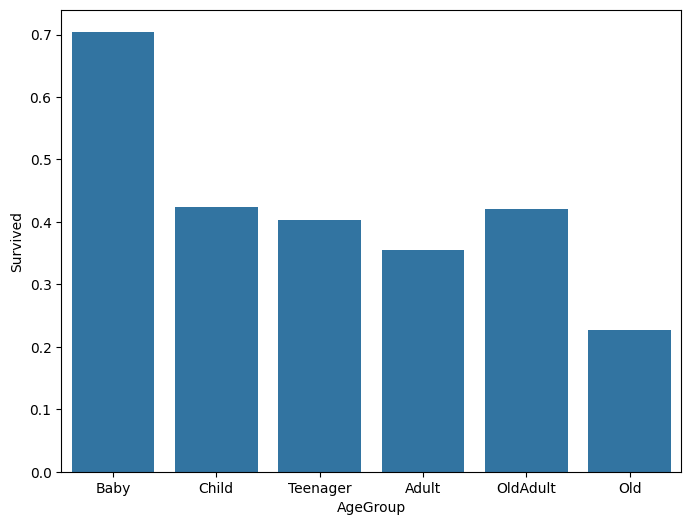

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")

# 나이에 따른 생존자와 사망자
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = df.groupby('AgeGroup', observed=False)['Survived'].value_counts(sort=False) 

survival_by_age_group.plot(kind="bar")
plt.show()

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_by_age_group)
print("\n")

# 연령대마다 생존율
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df, errorbar=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], legend=False)
plt.show()

train 데이터의 Age 카테고리를 먼저 나이대 별로 Group을 만들었다. 18, 30대 성년과 30, 60대 중장년 탑승객이 많다는 것을 알 수 있다.  
다음으로 나이에 따른 생존율을 비교할 수 있는데 아기 그룹을 제외한 모든 그룹에서 사망자가 더 많은 것을 알 수 있다.  
그래프를 통해 생존율을 시각화 했을 때 역시 아기 그룹을 제외하면 모두 낮은 생존율 확인이 가능하다.  

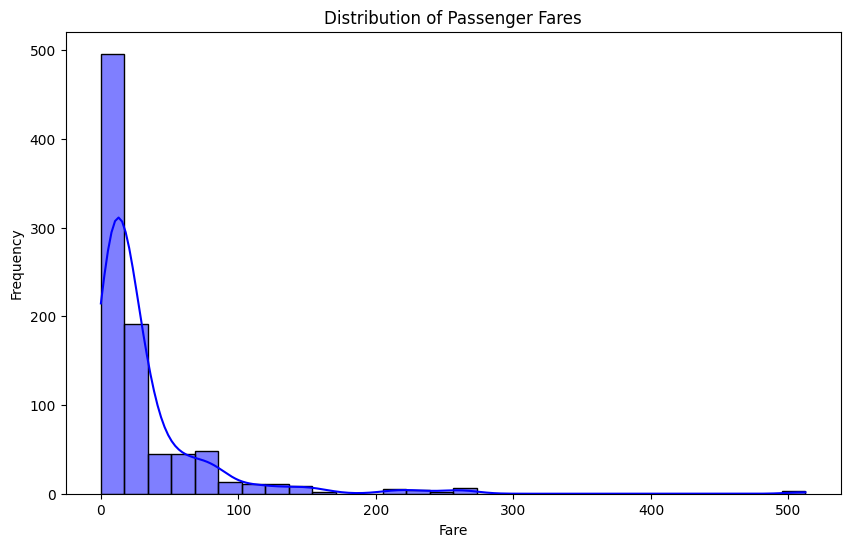

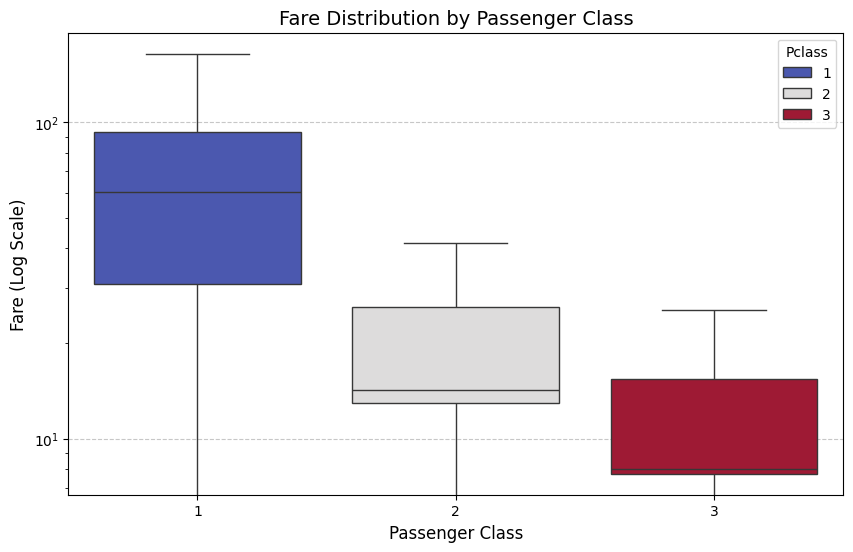

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")

# 고객 요금 분석
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30, color='blue')
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# 좌석 등급별 요금 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue="Pclass", data=df, palette='coolwarm', showfliers=False)
plt.yscale('log')  # 로그 스케일로 변환하여 데이터 분포를 명확히 표현
plt.title("Fare Distribution by Passenger Class", fontsize=14)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Fare (Log Scale)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

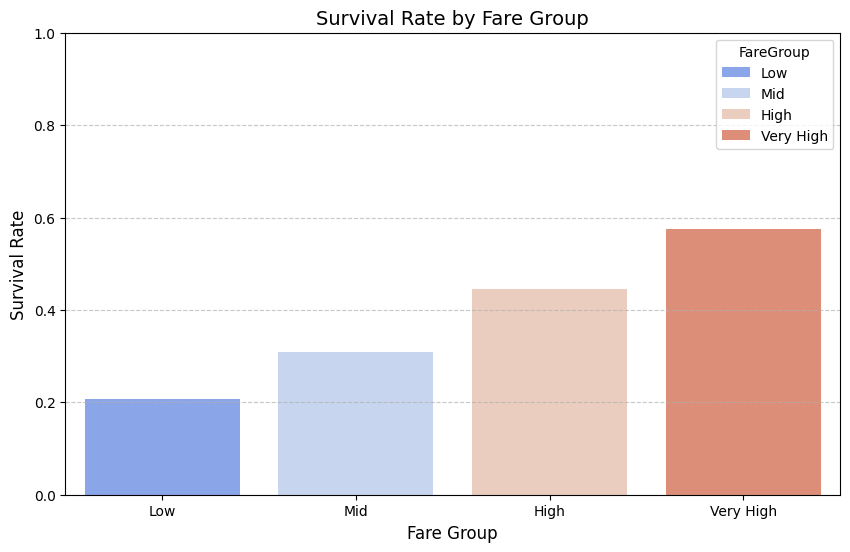

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Mid', 'High', 'Very High'])

# 고객 요금 구간 생성 및 생존율 분석
plt.figure(figsize=(10, 6))
sns.barplot(x='FareGroup', y='Survived', hue="FareGroup", data=df,  palette='coolwarm', errorbar=None)
plt.title("Survival Rate by Fare Group", fontsize=14)
plt.xlabel("Fare Group", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1)  # 생존율 범위를 0~1로 제한
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [35]:
# 고객 요금 분석 요약
print("고객 요금과 생존율 관계 분석 결과:")
print(df.groupby('FareGroup', observed=False)['Survived'].mean())
print("\n")

고객 요금과 생존율 관계 분석 결과:
FareGroup
Low          0.206731
Mid          0.308756
High         0.445415
Very High    0.575342
Name: Survived, dtype: float64




고객 요금을 분석했을 때 고객 요금을 많이 낸 인원이 적다는 것을 확인할 수 있다.

## 모델 학습 및 예측

### 1차 예측

결측치를 처리하는 과정에서 나이는 데이터가 왜곡된 경우에도 극단값의 영향을 받지 않는 중앙값으로 선택했다.   
고객 요금의 경우 결측값이 적고, 높은 요금의 빈도가 낮은 것으로 판단해 0으로 처리했다.  

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train 데이터 로드 및 전처리
df = pd.read_csv("./data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")

# 범주형 변수 숫자로 변환
for dataset in [df, test_df]:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Mid', 'High', 'Very High'])
    dataset['FareGroup'] = dataset['FareGroup'].map({'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3})

    # 결측치 처리
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Fare'] = dataset['Fare'].fillna(0)

# 학습에 사용할 특성 정의
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = df[features]  # df 데이터 특성
y = df['Survived']  # df 데이터 타겟

# Train/Validation 분할
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 2})  # 생존 클래스에 2배 가중치
model.fit(x_train, y_train)

# 평가
y_val_pred = model.predict(x_val) 
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Test 데이터 예측
x_test = test_df[features]
test_predictions = model.predict(x_test)

# classification_report 평가
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### 2차 예측

특성에 대한 가중치를 적용했다. 구명보트를 타는 데 있어 사회적 배려로 여성과 아기의 생존율이 높다는 것을 깨달았고 이에 가중치를 둬야겠다고 생각했다.  
고객 요금에 대한 가중치는 감소시켰다. 높은 요금을 낸 승객은 1등석일 가능성이 높으며, 1등석 승객은 구명보트를 사용할 확률이 높다. 다만, 요금 자체가 모든 경우에 직접적인 생존율의 원인이 되지 않을 수 있고 1, 2등석에 탔다고 해도 고객 요금을 압도적으로 많이 낸 건 아닌 것 같아 가중치를 감소시켰다.  

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train 데이터 로드 및 전처리
df = pd.read_csv("./data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")

# 범주형 변수 숫자로 변환
for dataset in [df, test_df]:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Mid', 'High', 'Very High'])
    dataset['FareGroup'] = dataset['FareGroup'].map({'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3})

    # 결측치 처리
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Fare'] = dataset['Fare'].fillna(0)

# 학습에 사용할 특성 정의
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = df[features]  # df 데이터 특성
y = df['Survived']  # df 데이터 타겟

# 특성 가중치 적용
df['Age'] *= 1.5  # 나이 가중치 증가
df['Sex'] *= 2.0  # 성별 가중치 증가
df['Fare'] = np.log1p(df['Fare'])  # 요금 로그 변환으로 가중치 감소

# 동일 전처리 test_df에도 적용
test_df['Age'] *= 1.5
test_df['Sex'] *= 2.0
test_df['Fare'] = np.log1p(test_df['Fare'])

# Train/Validation 분할
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 2})  # 생존 클래스에 2배 가중치
model.fit(x_train, y_train)

# 평가
y_val_pred = model.predict(x_val) 
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Test 데이터 예측
x_test = test_df[features]
test_predictions = model.predict(x_test)

# classification_report 평가
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### 3차 예측

결측치를 처리하는 과정에서 만약 좌석 등급에 따라 승객 요금이 다르다면, 결측값을 단순히 0으로 처리하는 것이 데이터의 잠재적 정보를 왜곡할 위험이 있다 생각했다. 때문에 승객 요금은 좌석 등급이나 승선 항구에 대한 정보를 활용할 수도 있다고 생각해 좌석 등급의 중앙값을 사용했다.
GridSearchCV를 통해 최적의 파라미터를 얻기 위한 작업을 했다.

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train 데이터 로드 및 전처리
df = pd.read_csv("./data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")

# 범주형 변수 숫자로 변환
for dataset in [df, test_df]:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Mid', 'High', 'Very High'])
    dataset['FareGroup'] = dataset['FareGroup'].map({'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3})

# 결측치 처리 함수
def preprocess_data(dataset):
    # 범주형 변수 변환
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low', 'Mid', 'High', 'Very High'])
    dataset['FareGroup'] = dataset['FareGroup'].map({'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3})

    # 결측치 처리
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Fare'] = dataset.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))
    return dataset

# 데이터 전처리
df = preprocess_data(df)
test_df = preprocess_data(test_df)

# 가중치 적용
X = df[features].copy()
X['Age'] *= 1.5
X['Sex'] *= 2.0
X['Fare'] = np.log1p(X['Fare'])

# Test 데이터도 동일한 방식으로 전처리
X_test = test_df[features].copy()
X_test['Age'] *= 1.5
X_test['Sex'] *= 2.0
X_test['Fare'] = np.log1p(X_test['Fare'])

# Train/Validation 분할
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가
model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 2})
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Test 데이터 예측
test_predictions = model.predict(X_test)

# classification_report 평가
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Validation Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       105
           1       0.67      0.65      0.66        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



### 4차 예측

GridSearchCV를 통해 복잡도 제어, 성능 최적화, 모델 일반화를 했다.  
과적합 방지에 중점을 둔 max_depth, n_estimators이 적용되며 성능이 감소했을 가능성도 있었지만 Fare 가중치 처리 방식, 로그 변환 등이 성능 저하의 원인이 된 것 같아 제거했다.  

In [52]:
# 최적의 하이퍼파라미터로 모델 생성
best_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

# 모델 학습
best_model.fit(x_train, y_train) 

# 평가
y_val_pred = best_model.predict(x_val) 
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Test 데이터 예측
x_test = test_df[features]
test_predictions = best_model.predict(x_test)

# classification_report 평가
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



사망자를 잘 식별하는 데 강점이 있어 실제 사망자를 놓칠 확률이 낮다. 반면 클래스 1 생존 Recall(0.73)으로 낮아, 생존자를 놓칠 가능성이 있다.
특히 생존자를 사망으로 잘못 예측하는 경우가 더 많음. 83%의 Accuracy로 전체 데이터에서 올바르게 예측한 비율은 낮지 않다.